# Logistic Regression 

In [1]:
import torch 
from torch.autograd import Variable
from torch import optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from data_utils import load_mnist

import warnings
warnings.filterwarnings("ignore") 

### Model Defining

In [2]:
def build_model(input_dim, output_dim):
    model = torch.nn.Sequential()
    model.add_module("linear",torch.nn.Linear(input_dim, output_dim, bias=False))
    return model

### Training Function

In [3]:
def train(model, loss, optimizer, x_val, y_val):
    '''
    Inputs : Model, Loss Function, Optimization Function, Input values and output values 
    Outputs : Predicted values through model
    '''
    x = Variable(x_val, requires_grad=False)
    y = Variable(y_val, requires_grad=False)

    # Reset gradient
    optimizer.zero_grad()

    # Forward
    fx = model.forward(x)
    output = loss.forward(fx, y)

    # Backward
    output.backward()

    # Update parameters
    optimizer.step()

    return output.item()

### Prediction Function

In [4]:
def predict(model, x_val):
    '''
    Inputs : Models
    Output: Predicted values in output variable 
    '''
    x = Variable(x_val, requires_grad=False)
    output = model.forward(x)
    return output.data.numpy().argmax(axis=1)

### Training the model

In [5]:
train_loss = []
torch.manual_seed(42)
trX, teX, trY, teY = load_mnist(onehot=False)
trX = torch.from_numpy(trX).float()
teX = torch.from_numpy(teX).float()
trY = torch.from_numpy(trY).long()

n_examples, n_features = trX.size()
n_classes = 10
model = build_model(n_features, n_classes)
loss = torch.nn.CrossEntropyLoss(reduction='elementwise_mean')
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
batch_size = 100

for i in range(100):
    cost = 0.
    num_batches = n_examples // batch_size
    for k in range(num_batches):
        start, end = k * batch_size, (k + 1) * batch_size
        cost += train(model, loss, optimizer,
                      trX[start:end], trY[start:end])
    predY = predict(model, teX)
    train_loss.append(cost/num_batches)
    print("Epoch %d, cost = %f, acc = %.2f%%"
          % (i + 1, cost / num_batches, 100. * np.mean(predY == teY)))

Epoch 1, cost = 0.547787, acc = 90.15%
Epoch 2, cost = 0.365290, acc = 90.95%
Epoch 3, cost = 0.338373, acc = 91.26%
Epoch 4, cost = 0.324327, acc = 91.48%
Epoch 5, cost = 0.315265, acc = 91.73%
Epoch 6, cost = 0.308756, acc = 91.78%
Epoch 7, cost = 0.303762, acc = 91.91%
Epoch 8, cost = 0.299754, acc = 91.98%
Epoch 9, cost = 0.296430, acc = 92.00%
Epoch 10, cost = 0.293606, acc = 92.02%
Epoch 11, cost = 0.291160, acc = 91.99%
Epoch 12, cost = 0.289010, acc = 92.05%
Epoch 13, cost = 0.287096, acc = 92.11%
Epoch 14, cost = 0.285375, acc = 92.16%
Epoch 15, cost = 0.283815, acc = 92.16%
Epoch 16, cost = 0.282389, acc = 92.22%
Epoch 17, cost = 0.281080, acc = 92.21%
Epoch 18, cost = 0.279869, acc = 92.24%
Epoch 19, cost = 0.278746, acc = 92.24%
Epoch 20, cost = 0.277698, acc = 92.26%
Epoch 21, cost = 0.276718, acc = 92.23%
Epoch 22, cost = 0.275797, acc = 92.25%
Epoch 23, cost = 0.274930, acc = 92.23%
Epoch 24, cost = 0.274111, acc = 92.25%
Epoch 25, cost = 0.273336, acc = 92.28%
Epoch 26,

Text(0.5, 1.0, 'Loss Curve')

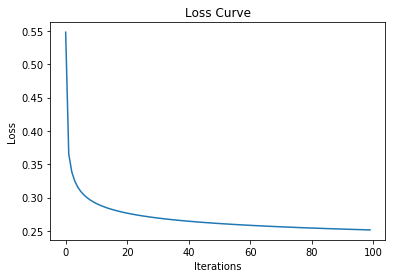

In [6]:
plt.plot(train_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')